<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Assignment_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An Institution wishes to find out their student’s ability in
mathematics, reading and writing skills. The Institution
wants to do an exploratory study to check the following
information.


In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
auto_data=pd.read_csv("/content/Students_Performance.csv")

#1.Read the dataset to python environment.

auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
auto_data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**a.Find out how many males and females participated in the test.**

Number of males: 482
Number of females: 518


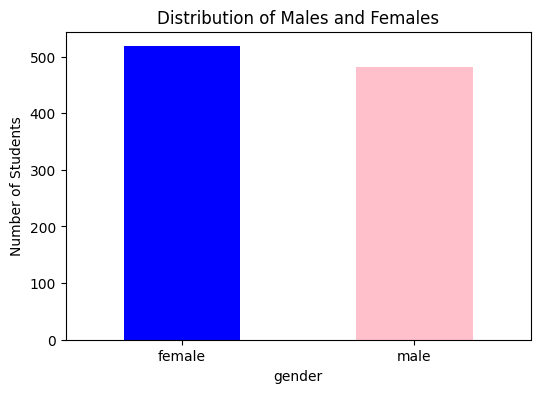

In [ ]:
gender_count = auto_data['gender'].value_counts()
num_males = gender_count['male']
num_females = gender_count['female']

print(f"Number of males: {num_males}")
print(f"Number of females: {num_females}")
plt.figure(figsize=(6, 4))
gender_count.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Males and Females')
plt.xlabel('gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

**b. What do you think about the students' parental level of
education?**

Parental Education Level Counts:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


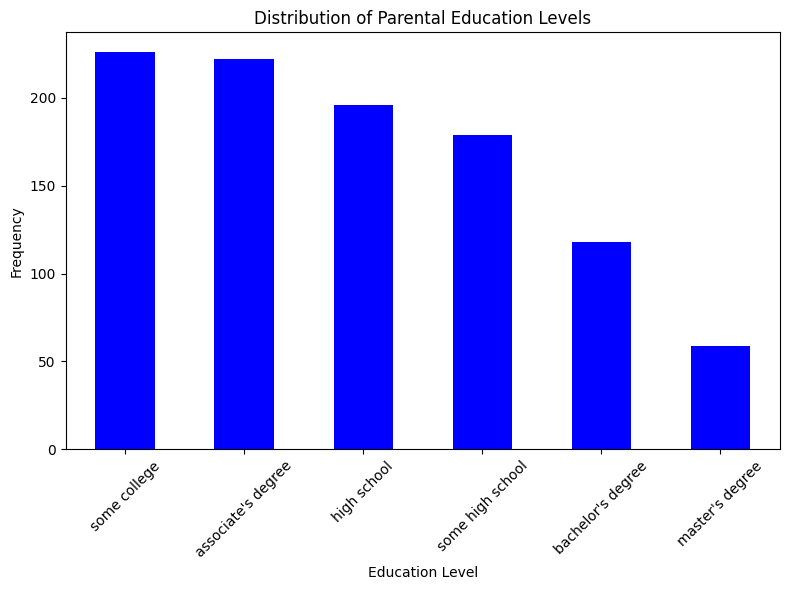

In [ ]:
parental_edu_counts = auto_data['parental level of education'].value_counts()
print("Parental Education Level Counts:")
print(parental_edu_counts)
plt.figure(figsize=(8, 6))
parental_edu_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Parental Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**c. Who scores the most on average for math, reading and
writing based on**
**i. Gender**
**ii. Test preparation course**

In [ ]:
print(auto_data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Statistics by Gender
   gender math score reading score writing score
                mean          mean          mean
0  female  63.376448     72.590734     72.467181
1    male  68.821577     65.545643     63.446058


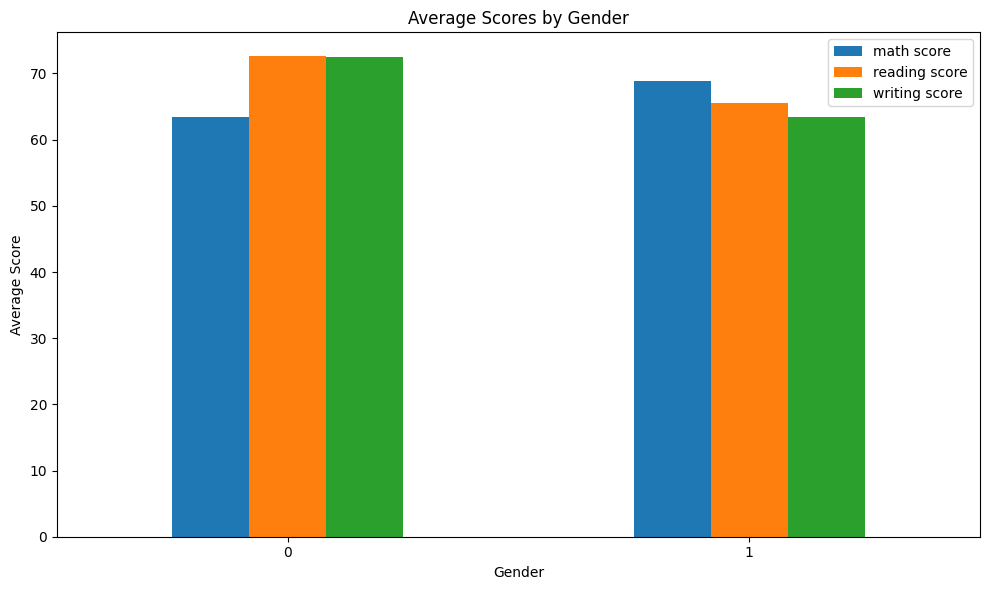

In [ ]:
stats_by_course = auto_data.groupby('gender').agg({
    'math score': ['mean'],
    'reading score': ['mean'],
    'writing score': ['mean']
}).reset_index()
print("Statistics by Gender")
print(stats_by_course)
stats_by_course.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['math score','reading score','writing score'], loc='upper right')
plt.tight_layout()
plt.show()

**Who scores the most on average for math, reading and writing based on**
**ii. Test preparation course**

Statistics by test preparation course
  test preparation course math score reading score writing score
                                mean          mean          mean
0               completed   69.96648     74.175978     74.684358
1                    none   63.78972     66.417445     64.457944


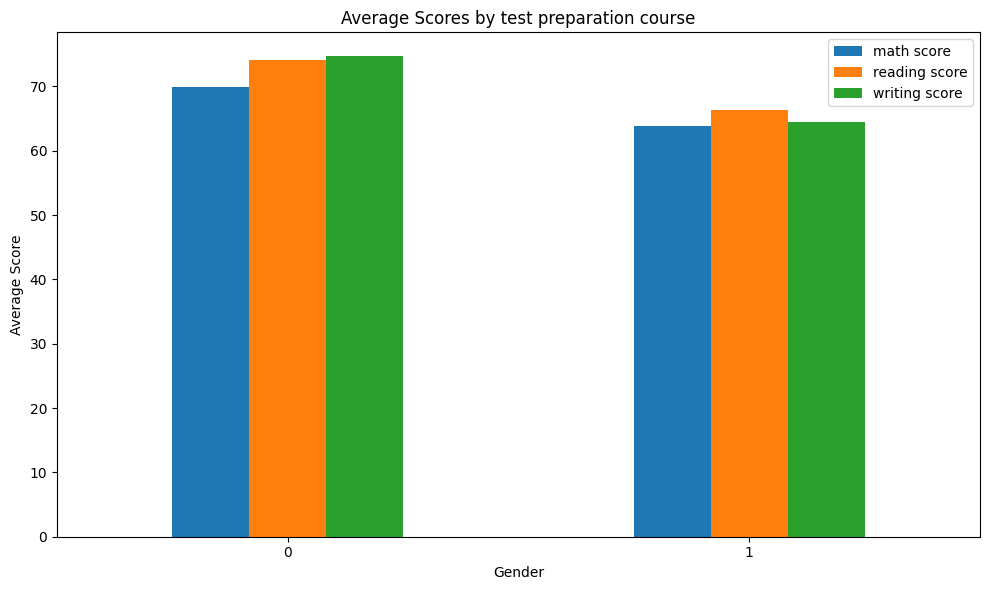

In [ ]:
stats_by_course = auto_data.groupby('test preparation course').agg({
    'math score': ['mean'],
    'reading score': ['mean'],
    'writing score': ['mean']
}).reset_index()
print("Statistics by test preparation course")
print(stats_by_course)
stats_by_course.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by test preparation course')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['math score','reading score','writing score'], loc='upper right')
plt.tight_layout()
plt.show()

**d. What do you think about the scoring variation for
math, reading and writing based on**
**ii. Test preparation course**

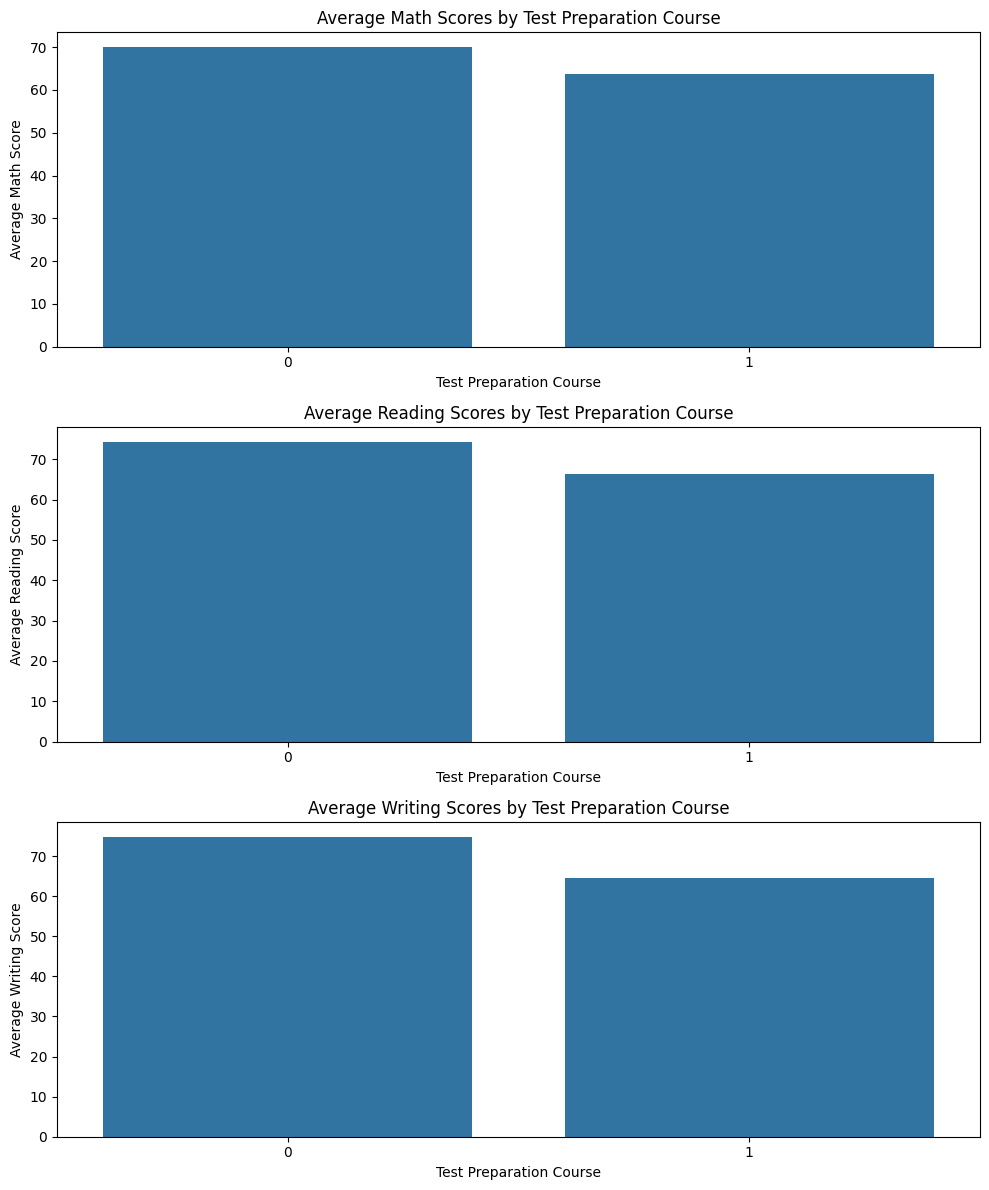

In [9]:
avg_scores = auto_data.groupby('test preparation course').mean({'math score', 'reading score', 'writing score'}).reset_index()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

ax1 = axes[0]
sns.barplot(x=avg_scores.index, y=avg_scores['math score'], ax=ax1)
ax1.set_title('Average Math Scores by Test Preparation Course')
ax1.set_xlabel('Test Preparation Course')
ax1.set_ylabel('Average Math Score')

ax2 = axes[1]
sns.barplot(x=avg_scores.index, y=avg_scores['reading score'], ax=ax2)
ax2.set_title('Average Reading Scores by Test Preparation Course')
ax2.set_xlabel('Test Preparation Course')
ax2.set_ylabel('Average Reading Score')

ax3 = axes[2]
sns.barplot(x=avg_scores.index, y=avg_scores['writing score'], ax=ax3)
ax3.set_title('Average Writing Scores by Test Preparation Course')
ax3.set_xlabel('Test Preparation Course')
ax3.set_ylabel('Average Writing Score')

plt.tight_layout()
plt.show()

**d. What do you think about the scoring variation for
math, reading and writing based on**
**i. Gender**

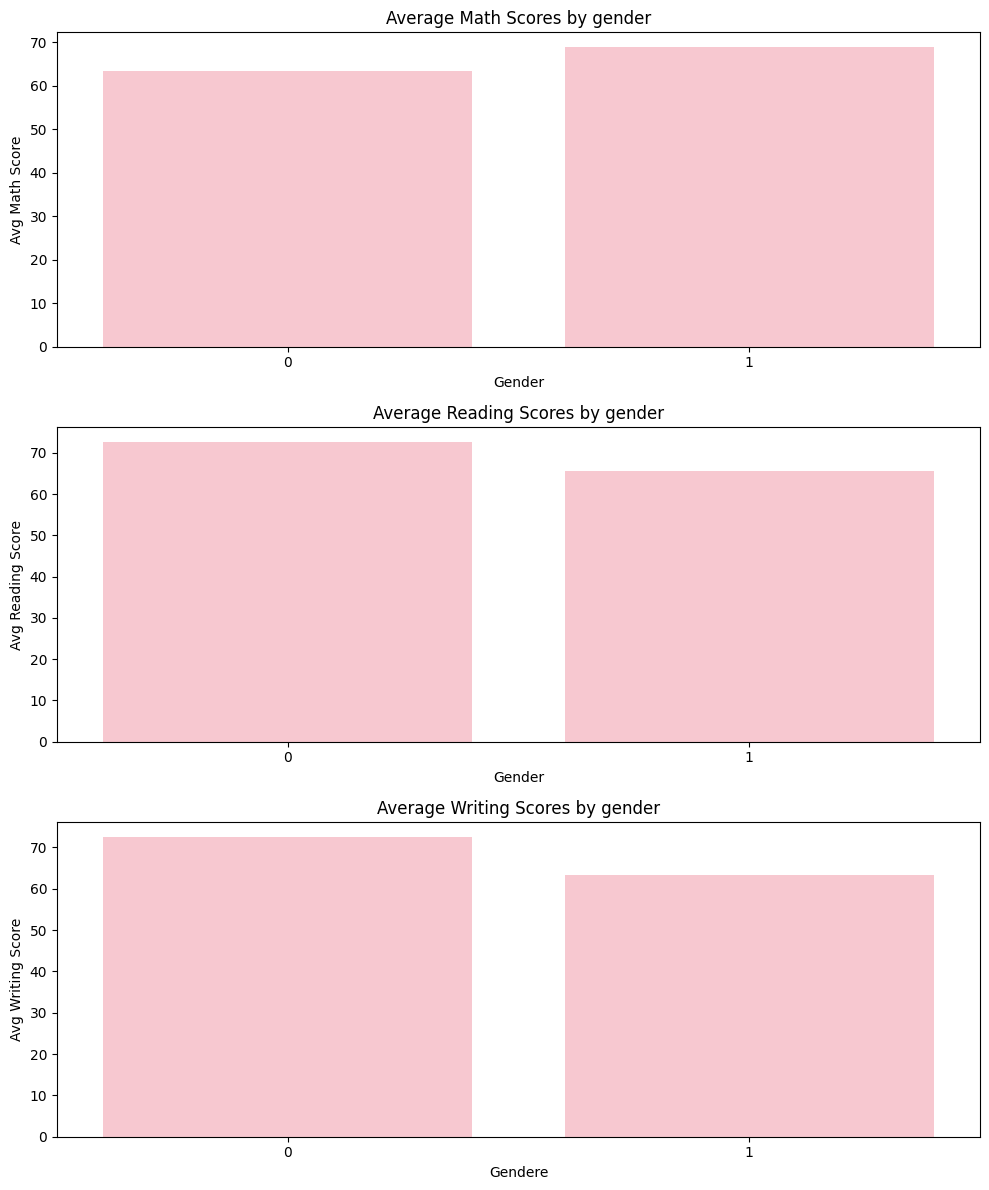

In [14]:
avg_scores = auto_data.groupby('gender').mean({'math score', 'reading score', 'writing score'}).reset_index()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

ax1 = axes[0]
sns.barplot(x=avg_scores.index, y=avg_scores['math score'], ax=ax1,color='pink')
ax1.set_title('Average Math Scores by gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Avg Math Score')

ax2 = axes[1]
sns.barplot(x=avg_scores.index, y=avg_scores['reading score'], ax=ax2,color='pink')
ax2.set_title('Average Reading Scores by gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Avg Reading Score')

# Plot for Writing Scores
ax3 = axes[2]
sns.barplot(x=avg_scores.index, y=avg_scores['writing score'], ax=ax3,color='pink')
ax3.set_title('Average Writing Scores by gender')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Avg Writing Score')

plt.tight_layout()
plt.show()

**e. The management needs your help to give bonus points
to the top 25% of students based on their math score,
so how will you help the management to achieve this.**

In [45]:
df_sorted = auto_data.sort_values(by='math score', ascending=False)
num_students = len(df_sorted)
#df_sorted
top_25_percent_cutoff = int(num_students * 0.25)
top_25_percent_students = df_sorted.head(top_25_percent_cutoff).copy()
bonus_point = 4
top_25_percent_students.loc[:,'Bonus_point'] = bonus_point
print(top_25_percent_students)



     gender race/ethnicity parental level of education         lunch  \
999    male        group E           bachelor's degree      standard   
996    male        group A                some college      standard   
515  female        group E                some college      standard   
517  female        group E          associate's degree      standard   
516  female        group E           bachelor's degree      standard   
..      ...            ...                         ...           ...   
856    male        group E            some high school      standard   
855    male        group E          associate's degree  free/reduced   
854    male        group D            some high school      standard   
853    male        group D          associate's degree  free/reduced   
852    male        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
999               completed         100            100        